In [141]:
import pandas as pd
import numpy as np

In [142]:
data = pd.read_csv('data.csv')

In [143]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


Проверим количество уникальных занечний для категорийных переменных

In [145]:
print('Item_Identifier', len(data.Item_Identifier.unique()))
print('Item_Fat_Content', len(data.Item_Fat_Content.unique()))
print('Item_Type', len(data.Item_Type.unique()))
print('Outlet_Identifier', len(data.Outlet_Identifier.unique()))
print('Outlet_Size', len(data.Outlet_Size.unique()))
print('Outlet_Location_Type', len(data.Outlet_Location_Type.unique()))
print('Outlet_Type', len(data.Outlet_Type.unique()))

Item_Identifier 1559
Item_Fat_Content 5
Item_Type 16
Outlet_Identifier 10
Outlet_Size 4
Outlet_Location_Type 3
Outlet_Type 4


Выведем информацию о числовых значениях

In [146]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Заполним пропуски в данных

Для колонки Item_Weight возмем среднее значение

In [147]:
data.Item_Weight[data.Item_Weight.isnull()] = data.Item_Weight.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
data.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [149]:
print('Medium', data.Outlet_Size[data.Outlet_Size == 'Medium'].count())
print('High', data.Outlet_Size[data.Outlet_Size == 'High'].count())
print('Small', data.Outlet_Size[data.Outlet_Size == 'Small'].count())

Medium 2793
High 932
Small 2388


Заполним пропуски значением 'Medium' 

In [150]:
data.Outlet_Size[data.Outlet_Size.isnull()] = 'Medium'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


Переведем категорийные переменные в целые значения

In [152]:
categoricals = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
continious = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
target = 'Item_Outlet_Sales'  

In [153]:
X = pd.concat([data[continious],pd.get_dummies(data[categoricals])],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 45 columns):
Item_Weight                        8523 non-null float64
Item_Visibility                    8523 non-null float64
Item_MRP                           8523 non-null float64
Outlet_Establishment_Year          8523 non-null int64
Item_Fat_Content_LF                8523 non-null uint8
Item_Fat_Content_Low Fat           8523 non-null uint8
Item_Fat_Content_Regular           8523 non-null uint8
Item_Fat_Content_low fat           8523 non-null uint8
Item_Fat_Content_reg               8523 non-null uint8
Item_Type_Baking Goods             8523 non-null uint8
Item_Type_Breads                   8523 non-null uint8
Item_Type_Breakfast                8523 non-null uint8
Item_Type_Canned                   8523 non-null uint8
Item_Type_Dairy                    8523 non-null uint8
Item_Type_Frozen Foods             8523 non-null uint8
Item_Type_Fruits and Vegetables    8523 non-null uint8
Item_Ty

In [154]:
y = data[target]

Проверим корреляцию параметров

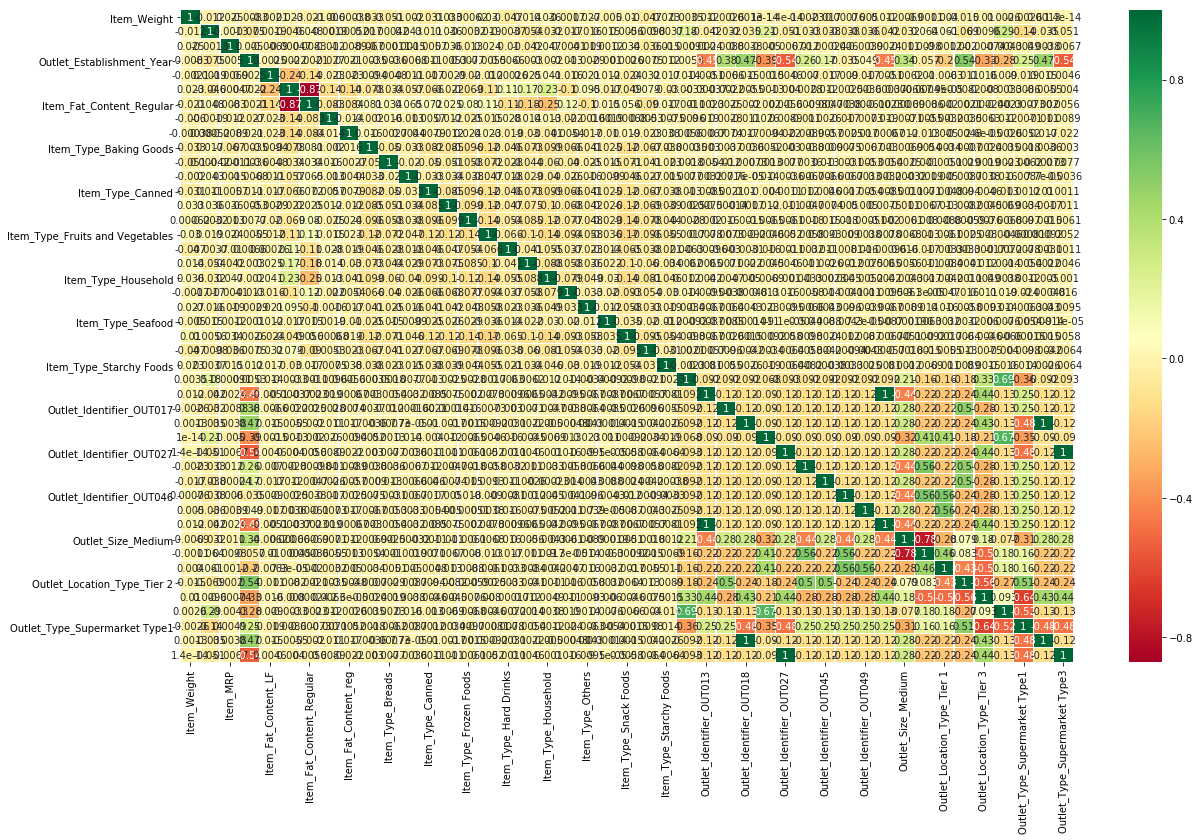

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(X.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

Удалим столбцы с большой взаимокорреляцией

In [156]:
corr_colums = ['Outlet_Establishment_Year', 
               'Item_Fat_Content_Regular', 
               'Outlet_Size_Small', 
               'Outlet_Location_Type_Tier 2',
               'Outlet_Identifier_OUT046',
               'Outlet_Identifier_OUT049',
               'Outlet_Location_Type_Tier 3',
               'Outlet_Identifier_OUT010',
               'Outlet_Identifier_OUT019',
               'Outlet_Type_Supermarket Type1',
               'Outlet_Identifier_OUT013',
               'Outlet_Identifier_OUT018',
               'Outlet_Identifier_OUT027'
              ]
X = X.drop(corr_colums, axis=1)
c = X.corr().abs()
c.reset_index()[c.reset_index()>0.5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 33 columns):
index                              32 non-null object
Item_Weight                        1 non-null float64
Item_Visibility                    1 non-null float64
Item_MRP                           1 non-null float64
Item_Fat_Content_LF                1 non-null float64
Item_Fat_Content_Low Fat           1 non-null float64
Item_Fat_Content_low fat           1 non-null float64
Item_Fat_Content_reg               1 non-null float64
Item_Type_Baking Goods             1 non-null float64
Item_Type_Breads                   1 non-null float64
Item_Type_Breakfast                1 non-null float64
Item_Type_Canned                   1 non-null float64
Item_Type_Dairy                    1 non-null float64
Item_Type_Frozen Foods             1 non-null float64
Item_Type_Fruits and Vegetables    1 non-null float64
Item_Type_Hard Drinks              1 non-null float64
Item_Type_Health and Hygiene     

Разабьем данные на тестовую и обучающую выборки

In [157]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

In [158]:
#from sklearn.preprocessing import StandardScaler

#le = StandardScaler()
#X_train = le.fit_transform(X_train)
#X_test = le.transform(X_test)

Для оценки качества модели используем среднеквадратичную ошибку

In [159]:
from sklearn.metrics import mean_squared_error

Построим линейную модель

In [160]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

line_model = LinearRegression()

score_on_train = 0
for trn_idx,tst_idx in KFold(n_splits=3,random_state=42).split(X_train,y_train):
    X_train_fold,y_train_fold = X.iloc[trn_idx],y.iloc[trn_idx]
    X_test_fold,y_test_fold = X.iloc[tst_idx],y.iloc[tst_idx]
    line_model.fit(X_train_fold,y_train_fold)
    y_pred = line_model.predict(X_test_fold)
    score_on_train += mean_squared_error(np.array(y_test_fold), y_pred)
    
print(score_on_train/3)

1285710.2525003704


Построим не линейную модель

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

non_line_model = RandomForestRegressor()

lr_params = {
    'n_estimators': [50, 75, 100],
    'max_depth': [5, 10, 15, 20, 25, None]
}
grid_lr = GridSearchCV(non_line_model, lr_params, scoring = 'mean_squared_error', cv = 3)
grid_lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\ProgramData\Anaconda3\lib\sit

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 75, 100], 'max_depth': [5, 10, 15, 20, 25, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='mean_squared_error', verbose=0)

In [162]:
print(grid_lr.best_params_)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

{'max_depth': 5, 'n_estimators': 100}
-1191538.152513815
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [163]:
non_line_model = RandomForestRegressor(max_depth=5, n_estimators=100)

Проведем стекинг моделей

In [164]:
stack_cv = KFold(n_splits=3, random_state=555)

In [165]:
def get_meta_features(clf, X_train, y_train, X_test, stack_cv):
    meta_train = np.zeros_like(y_train, dtype=float)
    meta_test = np.zeros_like(y_test, dtype=float)
    
    for i, (train_ind, test_ind) in enumerate(stack_cv.split(X_train, y_train)):
        
        clf.fit(X_train.iloc[train_ind], y_train.iloc[train_ind])
        meta_train[test_ind] = clf.predict(X_train.iloc[test_ind])
        meta_test += clf.predict(X_test)
    
    return meta_train, meta_test / stack_cv.n_splits

In [166]:
meta_train = []
meta_test = []
col_names = []

print('line features...')
meta_tr, meta_te = get_meta_features(line_model, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('line')

print('non line features...')
meta_tr, meta_te = get_meta_features(non_line_model, X_train, y_train, X_test, stack_cv)

meta_train.append(meta_tr)
meta_test.append(meta_te)
col_names.append('non line')

line features...
non line features...


In [168]:
X_meta_train = pd.DataFrame(np.stack(meta_train, axis=1), columns=col_names)
X_meta_test = pd.DataFrame(np.stack(meta_test, axis=1), columns=col_names)

model_meta = LinearRegression()
model_meta.fit(X_meta_train, y_train)
print ("mean_squared_error = ", mean_squared_error(model_meta.predict(X_meta_test), y_test.values))

mean_squared_error =  1138811.8547908172


Выведем наиболее важные признаки

In [171]:
non_line_model.feature_importances_
feature = pd.DataFrame()

In [175]:
feature['name'] = X.columns
feature['feature'] = non_line_model.feature_importances_

In [181]:
feature.sort_values(by='feature', ascending=False).head(3)

,name,feature
2,Item_MRP,0.550167
29,Outlet_Type_Grocery Store,0.310031
31,Outlet_Type_Supermarket Type3,0.128216
